# This notebook contains some analysis over dataset...

In [24]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, GenericUnivariateSelect

In [34]:
# Load write dataset
x_ds_c100 = pd.read_csv('datasets/exp90c_2h/col100/prometheus_metrics_wide.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(x_ds_c100.shape)
x_ds_c100.head(5)

(7803, 1864)


,timestamp,container_blkio_device_usage_total_0,container_blkio_device_usage_total_1,container_blkio_device_usage_total_2,container_blkio_device_usage_total_3,container_blkio_device_usage_total_4,container_blkio_device_usage_total_5,container_blkio_device_usage_total_6,container_blkio_device_usage_total_7,container_blkio_device_usage_total_8,...,network_transmit_bytes_per_container_35,network_transmit_bytes_per_container_36,network_transmit_bytes_per_container_37,network_transmit_bytes_per_container_38,network_transmit_bytes_per_container_39,network_transmit_bytes_per_container_40,network_transmit_bytes_per_container_41,network_transmit_bytes_per_container_42,network_transmit_bytes_per_container_43,network_transmit_bytes_per_container_44
0,1761764950,25874432,49966153728,25874432,48959823872,939503616,54006779904,939503616,49252225024,126316544,...,9830.733229,0,91585.415260,0,12174.886948,0,84544.341801,0,0.0,0.0
1,1761764951,25874432,49966264320,25874432,48959823872,939503616,54006779904,939503616,49252225024,126316544,...,12617.713285,0,97118.367347,0,12799.949354,0,97232.342007,0,0.0,0.0
2,1761764952,25874432,49966264320,25874432,48959823872,939503616,54006779904,939503616,49252225024,126316544,...,11999.762131,0,103181.455064,0,13015.958816,0,92537.726045,0,0.0,0.0
3,1761764953,25874432,49966264320,25874432,48959823872,939503616,54006779904,939503616,49252225024,126316544,...,13355.328158,0,80528.189911,0,13181.699687,0,86272.084806,0,0.0,0.0
4,1761764954,25874432,49966264320,25874432,48959823872,939503616,54006779904,939503616,49252225024,126316544,...,12512.404896,0,96229.002764,0,13205.837019,0,107943.632075,0,0.0,0.0


In [35]:
y_ds_c100 = pd.read_csv('datasets/exp90c_2h/col100/20251029_190910599_w.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(y_ds_c100.shape)
y_ds_c100.head(5)

y_ds_c100_w_99th_percentile = y_ds_c100[['w_99th_percentile']].copy()
print(y_ds_c100_w_99th_percentile.shape)
y_ds_c100_w_99th_percentile.head(5)

(7803, 45)
(7803, 1)


,w_99th_percentile
0,0.0
1,5.0
2,35.0
3,35.0
4,35.0


In [45]:
# Load write dataset
x_ds_c500 = pd.read_csv('datasets/exp90c_2h/col500/prometheus_metrics_wide.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(x_ds_c500.shape)
x_ds_c500.head(5)

(7803, 1864)


,timestamp,container_blkio_device_usage_total_0,container_blkio_device_usage_total_1,container_blkio_device_usage_total_2,container_blkio_device_usage_total_3,container_blkio_device_usage_total_4,container_blkio_device_usage_total_5,container_blkio_device_usage_total_6,container_blkio_device_usage_total_7,container_blkio_device_usage_total_8,...,network_transmit_bytes_per_container_35,network_transmit_bytes_per_container_36,network_transmit_bytes_per_container_37,network_transmit_bytes_per_container_38,network_transmit_bytes_per_container_39,network_transmit_bytes_per_container_40,network_transmit_bytes_per_container_41,network_transmit_bytes_per_container_42,network_transmit_bytes_per_container_43,network_transmit_bytes_per_container_44
0,1761691908,25059328,35204870144,25059328,34442665984,939057152,38510039040,939057152,34771095552,126283776,...,12695.717884,0,107160.625444,0,14931.018190,0,90031.496063,0,0.000000,0.0
1,1761691909,25059328,35204870144,25059328,34442665984,939057152,38510039040,939057152,34771095552,126283776,...,13004.904491,0,102092.105263,0,15877.237049,0,89860.019646,0,0.000000,0.0
2,1761691910,25059328,35204870144,25059328,34442665984,939057152,38510039040,939057152,34771095552,126283776,...,13329.804129,0,85997.862740,0,11007.254788,0,91291.126620,0,0.000000,0.0
3,1761691911,25059328,35204870144,25059328,34442665984,939057152,38510039040,939057152,34771095552,126283776,...,13172.026144,0,87044.262689,0,10854.644495,0,64721.032512,0,0.000000,0.0
4,1761691912,25059328,35204870144,25059328,34442665984,939057152,38510039040,939057152,34771095552,126283776,...,11744.951848,0,86899.111218,0,10854.644495,0,94668.733850,0,17.014695,0.0


In [46]:
y_ds_c500 = pd.read_csv('datasets/exp90c_2h/col500/20251028_225148170_w.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(y_ds_c500.shape)
y_ds_c500.head(5)

y_ds_c500_w_99th_percentile = y_ds_c500[['w_99th_percentile']].copy()
print(y_ds_c500_w_99th_percentile.shape)
y_ds_c500_w_99th_percentile.head(5)

(7803, 45)
(7803, 1)


,w_99th_percentile
0,0.0
1,5.0
2,5.0
3,5.0
4,5.0


# SELECTKBEST FEATURES - 100COLUNAS

In [54]:
# # Identify columns to normalize (all except the first)
# cols_to_normalize = x_ds_c100.columns[1:]

# # Extract the columns to be normalized
# df_to_normalize = x_ds_c100[cols_to_normalize]

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the selected columns
# normalized_data = scaler.fit_transform(df_to_normalize)

# # Create a new DataFrame with the normalized values
# x_ds_c100_norm = pd.DataFrame(normalized_data, columns=cols_to_normalize, index=x_ds_c100.index)

# # Concatenate the first column with the normalized DataFrame
# x_ds_c100_norm = pd.concat([x_ds_c100.iloc[:, :1], x_ds_c100_norm], axis=1)

# # Print the final DataFrame
# print(x_ds_c100_norm.shape)

selector = SelectKBest(f_regression, k=10)
x_ds_c100_10f = selector.fit_transform(x_ds_c100, y_ds_c100_w_99th_percentile)

# Get a boolean mask of selected features
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = x_ds_c100.columns[selected_features_mask]
print(selected_feature_names)

x_ds_c100_10f = pd.DataFrame(x_ds_c100_10f, columns=selected_feature_names, index=x_ds_c100.index)
print(x_ds_c100_10f.shape)
x_ds_c100_10f.head(5)

Index(['network_receive_bytes_per_container_3',
       'network_receive_bytes_per_container_5',
       'network_receive_bytes_per_container_8',
       'network_receive_bytes_per_container_11',
       'network_receive_bytes_per_container_12',
       'network_transmit_bytes_per_container_3',
       'network_transmit_bytes_per_container_5',
       'network_transmit_bytes_per_container_8',
       'network_transmit_bytes_per_container_11',
       'network_transmit_bytes_per_container_12'],
      dtype='object')
(7803, 10)


/home/johny/environment/repositories/smartness-experiments/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/johny/environment/repositories/smartness-experiments/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


,network_receive_bytes_per_container_3,network_receive_bytes_per_container_5,network_receive_bytes_per_container_8,network_receive_bytes_per_container_11,network_receive_bytes_per_container_12,network_transmit_bytes_per_container_3,network_transmit_bytes_per_container_5,network_transmit_bytes_per_container_8,network_transmit_bytes_per_container_11,network_transmit_bytes_per_container_12
0,0.000000,7721.381673,6353.459119,4263.591936,4293.746052,0.000000,8830.145589,6316.981132,4104.764814,4428.932407
1,0.000000,7721.381673,8298.475413,7187.890754,4855.717137,0.000000,8830.145589,7587.932145,4811.780191,4568.577131
2,8274.781561,28078.035553,9507.306226,27163.737280,28649.805447,10219.343176,97589.936728,7690.279543,9837.650324,11675.745785
3,12356.867196,33536.435868,43527.118147,38872.992701,28649.805447,17018.161180,112449.262202,17233.948989,12519.343066,11675.745785
4,19343.283582,48180.170576,44647.224631,43682.130584,49720.636068,26640.014215,170982.942431,16565.047702,12706.921944,17022.045537


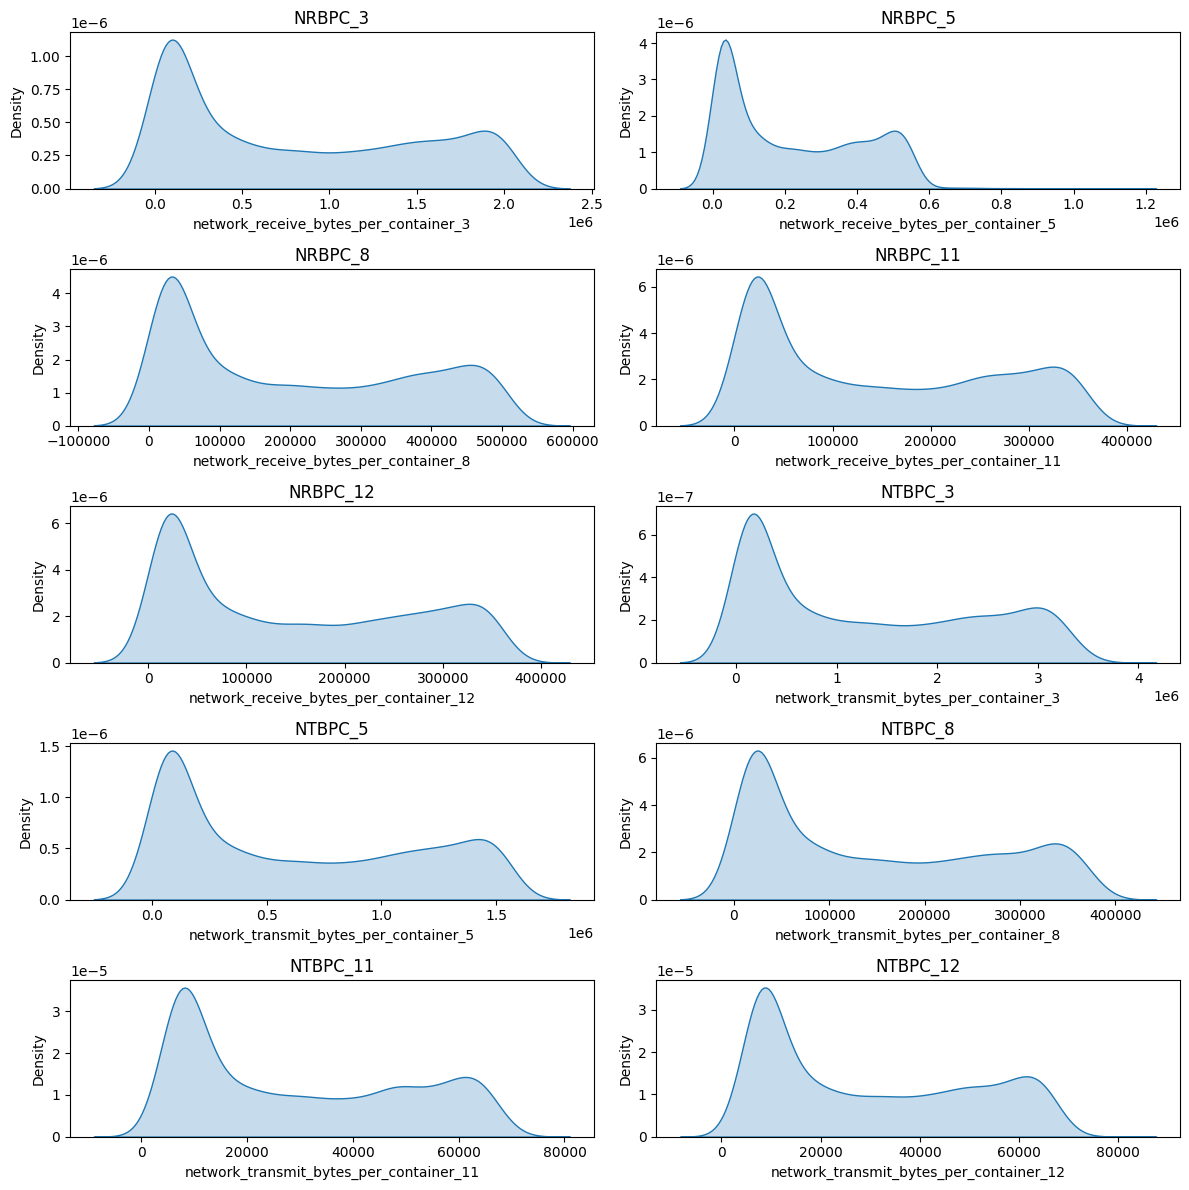

In [60]:
# kde kbest features
fig, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.kdeplot(x_ds_c100_10f['network_receive_bytes_per_container_3'],fill=True, ax=axes[0,0])
axes[0,0].set_title("NRBPC_3")

sns.kdeplot(x_ds_c100_10f['network_receive_bytes_per_container_5'],fill=True, ax=axes[0,1])
axes[0,1].set_title("NRBPC_5")

sns.kdeplot(x_ds_c100_10f['network_receive_bytes_per_container_8'],fill=True, ax=axes[1,0])
axes[1,0].set_title("NRBPC_8")

sns.kdeplot(x_ds_c100_10f['network_receive_bytes_per_container_11'],fill=True, ax=axes[1,1])
axes[1,1].set_title("NRBPC_11")

sns.kdeplot(x_ds_c100_10f['network_receive_bytes_per_container_12'],fill=True, ax=axes[2,0])
axes[2,0].set_title("NRBPC_12")

sns.kdeplot(x_ds_c100_10f['network_transmit_bytes_per_container_3'],fill=True, ax=axes[2,1])
axes[2,1].set_title("NTBPC_3")

sns.kdeplot(x_ds_c100_10f['network_transmit_bytes_per_container_5'],fill=True, ax=axes[3,0])
axes[3,0].set_title("NTBPC_5")

sns.kdeplot(x_ds_c100_10f['network_transmit_bytes_per_container_8'],fill=True, ax=axes[3,1])
axes[3,1].set_title("NTBPC_8")

sns.kdeplot(x_ds_c100_10f['network_transmit_bytes_per_container_11'],fill=True, ax=axes[4,0])
axes[4,0].set_title("NTBPC_11")

sns.kdeplot(x_ds_c100_10f['network_transmit_bytes_per_container_12'],fill=True, ax=axes[4,1])
axes[4,1].set_title("NTBPC_12")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_90c_2h', 'kde_10best_features_c100.png'))
plt.show()

# SELECTKBEST FEATURES - 500COLUNAS

In [58]:
# # Identify columns to normalize (all except the first)
# cols_to_normalize = x_ds_c500.columns[1:]

# # Extract the columns to be normalized
# df_to_normalize = x_ds_c500[cols_to_normalize]

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the selected columns
# normalized_data = scaler.fit_transform(df_to_normalize)

# # Create a new DataFrame with the normalized values
# x_ds_c500_norm = pd.DataFrame(normalized_data, columns=cols_to_normalize, index=x_ds_c500.index)

# # Concatenate the first column with the normalized DataFrame
# x_ds_c500_norm = pd.concat([x_ds_c500.iloc[:, :1], x_ds_c500_norm], axis=1)

# # Print the final DataFrame
# print(x_ds_c500_norm.shape)

selector = SelectKBest(f_regression, k=10)
x_ds_c500_10f = selector.fit_transform(x_ds_c500, y_ds_c500_w_99th_percentile)

# Get a boolean mask of selected features
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = x_ds_c500.columns[selected_features_mask]
print(selected_feature_names)

x_ds_c500_10f = pd.DataFrame(x_ds_c500_10f, columns=selected_feature_names, index=x_ds_c500.index)
print(x_ds_c500_10f.shape)
x_ds_c500_10f.head(5)

Index(['user_cpu_usage_0', 'user_cpu_usage_1',
       'network_receive_bytes_per_container_0',
       'network_receive_bytes_per_container_3',
       'network_receive_bytes_per_container_5',
       'network_receive_bytes_per_container_11',
       'network_receive_bytes_per_container_12',
       'network_transmit_bytes_per_container_3',
       'network_transmit_bytes_per_container_5',
       'network_transmit_bytes_per_container_11'],
      dtype='object')
(7803, 10)


/home/johny/environment/repositories/smartness-experiments/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/johny/environment/repositories/smartness-experiments/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


,user_cpu_usage_0,user_cpu_usage_1,network_receive_bytes_per_container_0,network_receive_bytes_per_container_3,network_receive_bytes_per_container_5,network_receive_bytes_per_container_11,network_receive_bytes_per_container_12,network_transmit_bytes_per_container_3,network_transmit_bytes_per_container_5,network_transmit_bytes_per_container_11
0,1.214172,1.582139,5313.082370,33.137485,7236.897767,6936.683417,8380.704042,41.598120,6179.083431,6176.214405
1,1.887216,1.600940,5027.500000,50.994575,6142.133816,35377.643505,26078.840054,64.014467,5342.857143,7332.326284
2,1.887216,6.096586,84162.271374,34422.591207,32083.021515,47135.742484,33678.362573,48170.954163,246520.112254,7955.056180
3,4.400453,12.088718,118535.866261,67367.301232,64900.335946,132700.385019,118091.544819,105189.529675,520102.743561,15791.039552
4,5.264422,15.230378,196014.272417,99349.524544,82961.192496,135698.882314,164520.449898,149231.046004,642469.545104,16586.456279


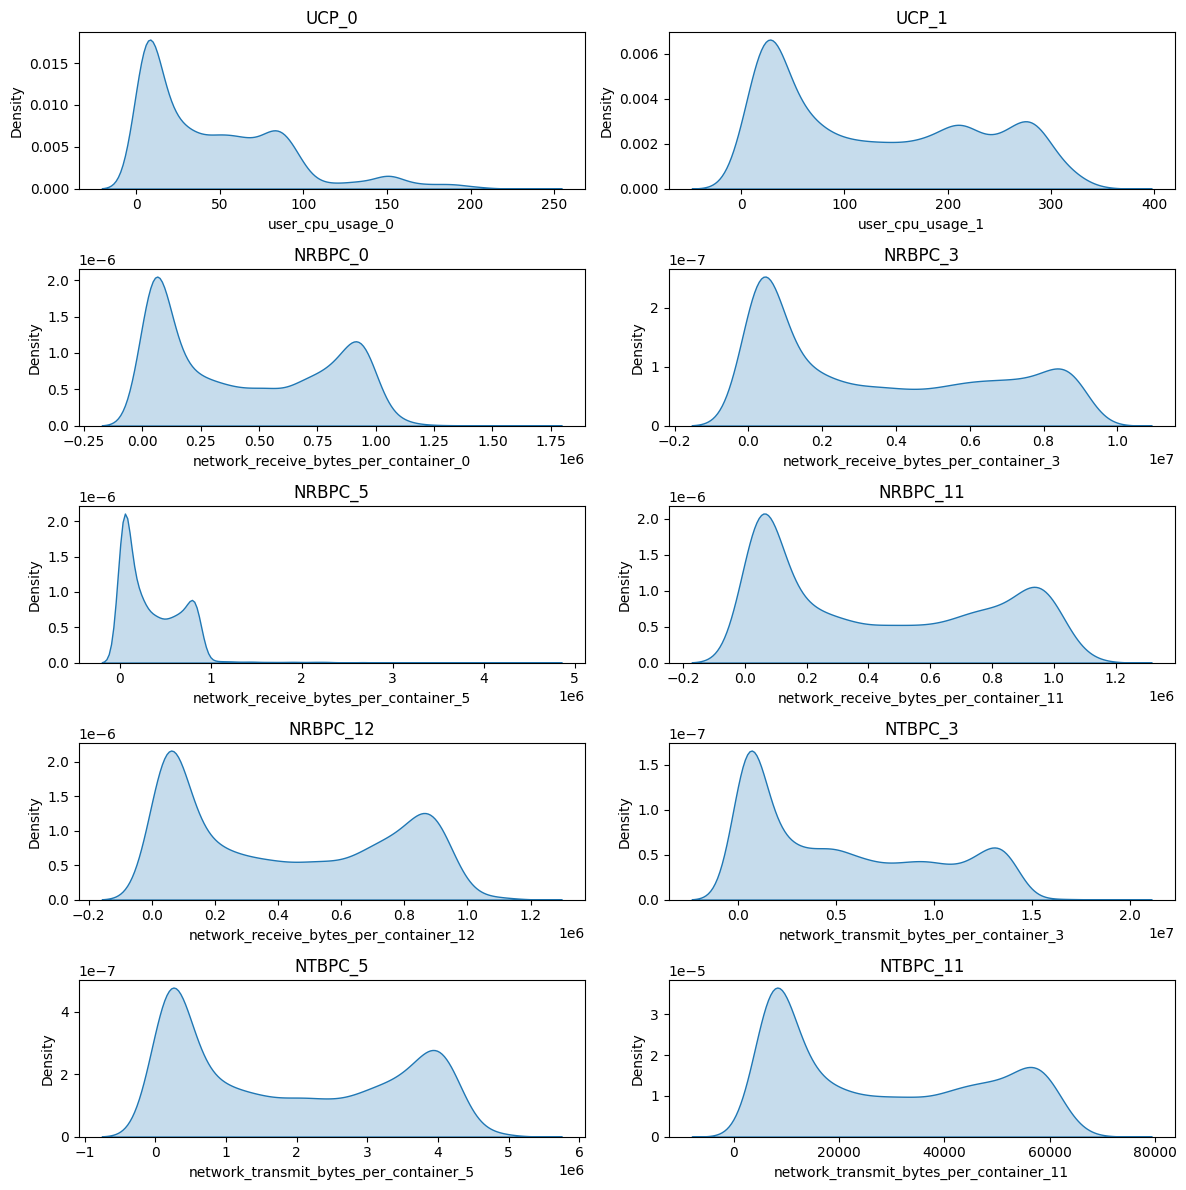

In [61]:
# kde kbest features
fig, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.kdeplot(x_ds_c500_10f['user_cpu_usage_0'],fill=True, ax=axes[0,0])
axes[0,0].set_title("UCP_0")

sns.kdeplot(x_ds_c500_10f['user_cpu_usage_1'],fill=True, ax=axes[0,1])
axes[0,1].set_title("UCP_1")

sns.kdeplot(x_ds_c500_10f['network_receive_bytes_per_container_0'],fill=True, ax=axes[1,0])
axes[1,0].set_title("NRBPC_0")

sns.kdeplot(x_ds_c500_10f['network_receive_bytes_per_container_3'],fill=True, ax=axes[1,1])
axes[1,1].set_title("NRBPC_3")

sns.kdeplot(x_ds_c500_10f['network_receive_bytes_per_container_5'],fill=True, ax=axes[2,0])
axes[2,0].set_title("NRBPC_5")

sns.kdeplot(x_ds_c500_10f['network_receive_bytes_per_container_11'],fill=True, ax=axes[2,1])
axes[2,1].set_title("NRBPC_11")

sns.kdeplot(x_ds_c500_10f['network_receive_bytes_per_container_12'],fill=True, ax=axes[3,0])
axes[3,0].set_title("NRBPC_12")

sns.kdeplot(x_ds_c500_10f['network_transmit_bytes_per_container_3'],fill=True, ax=axes[3,1])
axes[3,1].set_title("NTBPC_3")

sns.kdeplot(x_ds_c500_10f['network_transmit_bytes_per_container_5'],fill=True, ax=axes[4,0])
axes[4,0].set_title("NTBPC_5")

sns.kdeplot(x_ds_c500_10f['network_transmit_bytes_per_container_11'],fill=True, ax=axes[4,1])
axes[4,1].set_title("NTBPC_11")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_90c_2h', 'kde_10best_features_c500.png'))
plt.show()

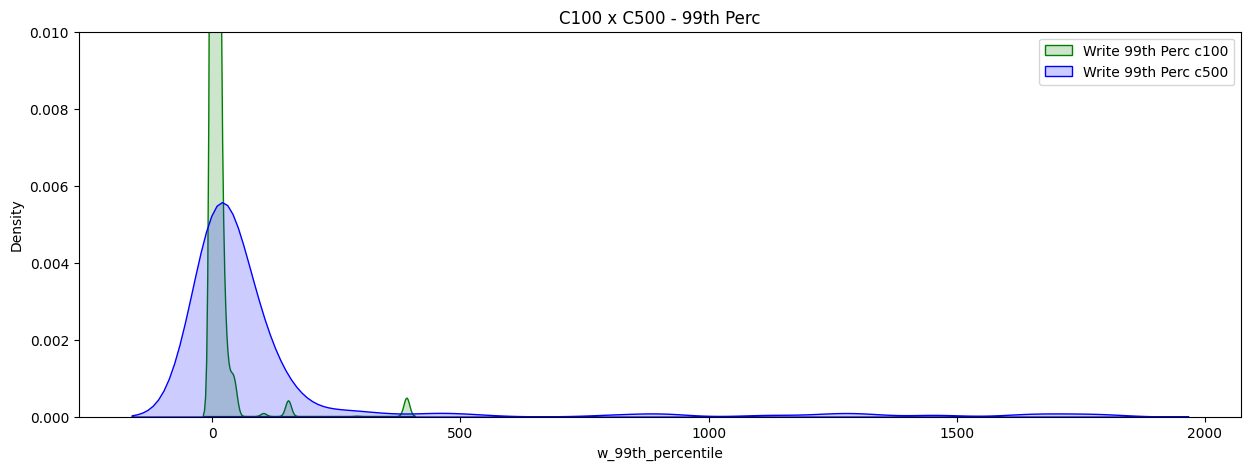

In [68]:
# 99_9th_percentile
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.kdeplot(y_ds_c100['w_99th_percentile'], color='green', fill=True, label='Write 99th Perc c100', alpha=.2)
sns.kdeplot(y_ds_c500['w_99th_percentile'], color='b', fill=True, label='Write 99th Perc c500', alpha=.2)
axes.set_title("C100 x C500 - 99th Perc")
# axes.set_xlim(-0.5, 65)
axes.set_ylim(0, 0.010)
axes.legend()

plt.savefig(os.path.join('images/exp_90c_2h', 'kde_w_99th_percentile_comparison.png'))
plt.show()

In [72]:
y_ds_r_c100 = pd.read_csv('datasets/exp90c_2h/col100/20251029_190910599_r.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(y_ds_r_c100.shape)
y_ds_r_c100.head(5)

y_ds_r_c500 = pd.read_csv('datasets/exp90c_2h/col500/20251028_225148170_r.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(y_ds_r_c500.shape)
y_ds_r_c500.head(5)

(7803, 45)
(7803, 45)


,timestamp,queries_num,queries_requested,errors_occurred,iter_errors_occurred,average_latency,99_9_latency_percentile,mean_rate,one_minute_rate,five_minute_rate,...,w_min,w_max,w_mean,w_std_dev,w_median,w_75th_percentile,w_95th_percentile,w_98th_percentile,w_99th_percentile,w_99_9th_percentile
0,1761691908,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0
1,1761691909,3,0,0,0,78,1,0.032918,0.0,0.0,...,74,83,78.500000,6.363961,78.5,83.00,83.0,83.0,83.0,83
2,1761691910,5,0,0,0,72,1,0.054267,0.0,0.0,...,66,83,72.800000,6.379655,71.0,77.00,83.0,83.0,83.0,83
3,1761691911,8,0,0,0,67,1,0.085896,0.0,0.0,...,46,83,67.142857,11.696560,70.0,73.50,83.0,83.0,83.0,83
4,1761691912,10,0,0,0,59,1,0.106229,0.0,0.0,...,35,83,59.700000,15.620855,63.0,71.25,83.0,83.0,83.0,83


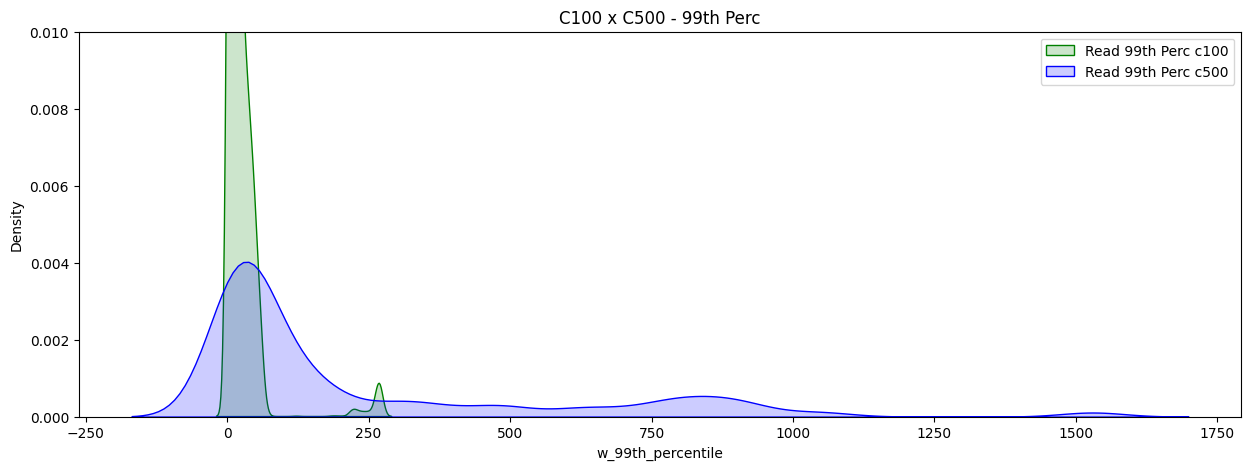

In [73]:
# 99th_percentile
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.kdeplot(y_ds_r_c100['w_99th_percentile'], color='green', fill=True, label='Read 99th Perc c100', alpha=.2)
sns.kdeplot(y_ds_r_c500['w_99th_percentile'], color='b', fill=True, label='Read 99th Perc c500', alpha=.2)
axes.set_title("C100 x C500 - 99th Perc")
# axes.set_xlim(-0.5, 65)
axes.set_ylim(0, 0.010)
axes.legend()

plt.savefig(os.path.join('images/exp_90c_2h', 'kde_read_w_99th_percentile_comparison.png'))
plt.show()